In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [12]:
data_path = 'C:/Users/Lenovo/Desktop/365/project-files-music-genre-classification-with-pca/music_dataset_mod.csv'
data = pd.read_csv(data_path)

In [14]:
data_copy = data.copy()  
print(data_copy.info())
print(data_copy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [16]:
missing_values = data_copy.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64


In [18]:
genres = data_copy['Genre'].unique()
print("Unique genres:", genres)

Unique genres: ['Country' 'Classical' 'Rock' 'Hip-hop' nan 'Jazz']


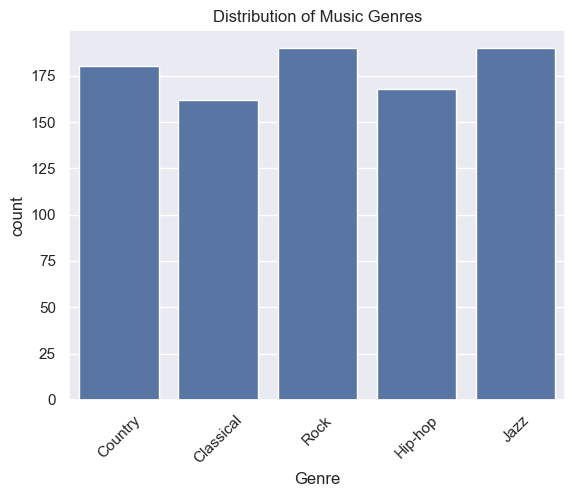

In [20]:
sns.countplot(x='Genre', data=data_copy)
plt.title("Distribution of Music Genres")
plt.xticks(rotation=45)
plt.show()

In [24]:
cleaned_data = data_copy.dropna(subset=['Genre'])
le = LabelEncoder()
cleaned_data['Genre_encoded'] = le.fit_transform(cleaned_data['Genre'])
correlation_matrix = cleaned_data.corr()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4484\3439696320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Genre_encoded'] = le.fit_transform(cleaned_data['Genre'])


ValueError: could not convert string to float: 'Country'

Non-numeric columns: Index(['Genre'], dtype='object')


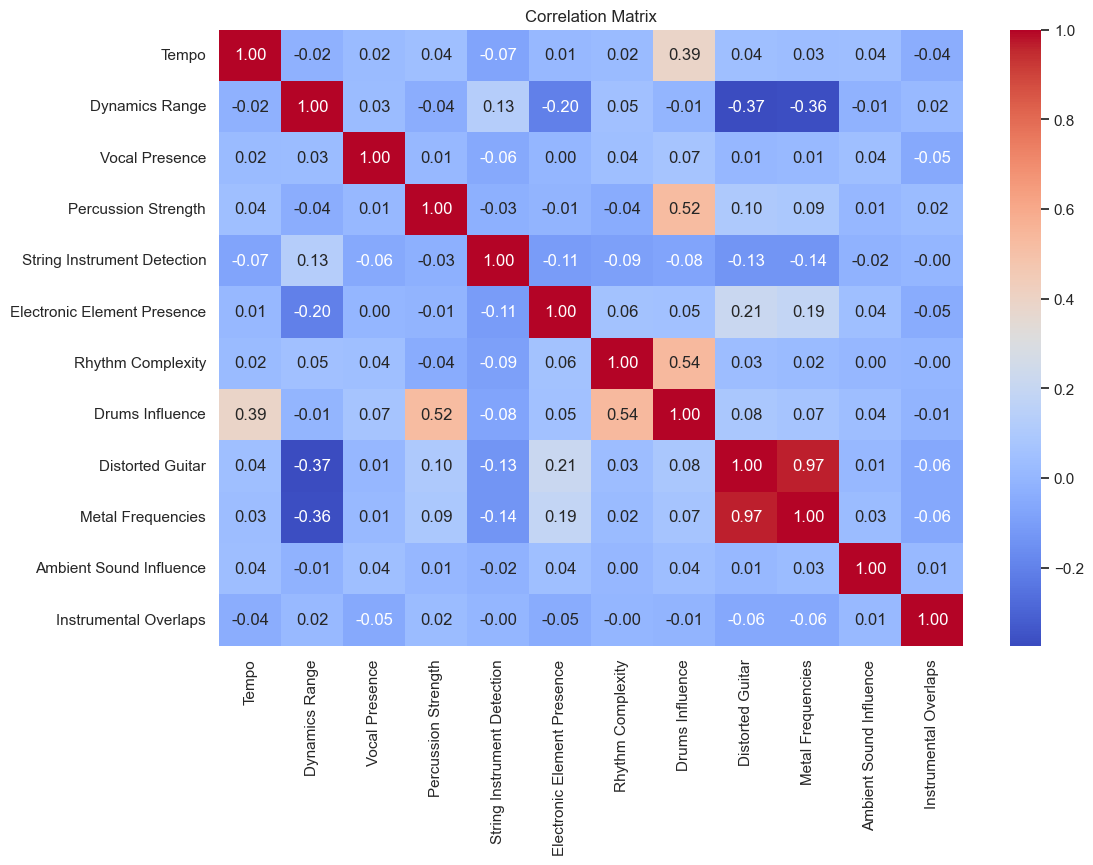

In [28]:
non_numeric_columns = cleaned_data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Exclude non-numeric columns from features
features = cleaned_data.drop(columns=['Genre', 'Genre_encoded'] + list(non_numeric_columns))

# Generate a correlation matrix
correlation_matrix = features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [32]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

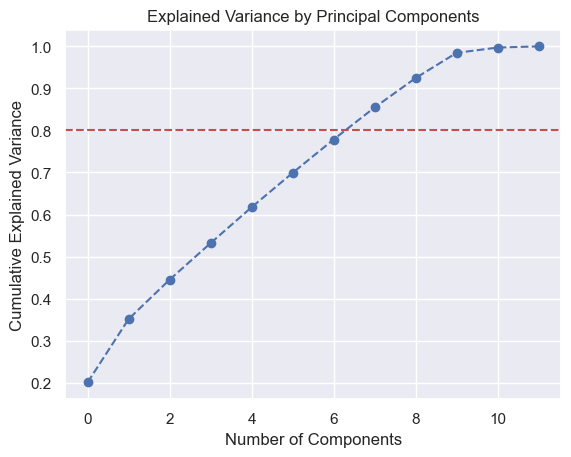

In [34]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance, marker='o', linestyle='--')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=0.8, color='r', linestyle='--')
plt.show()

In [36]:
n_components = np.argmax(explained_variance >= 0.8) + 1
print(f"Number of components explaining at least 80% variance: {n_components}")

Number of components explaining at least 80% variance: 8


In [38]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [40]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, cleaned_data['Genre_encoded'], test_size=0.3, random_state=42)

log_reg_pca = LogisticRegression(max_iter=10000)
log_reg_pca.fit(X_train_pca, y_train)

LogisticRegression(max_iter=10000)

In [42]:
pred_pca = log_reg_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, pred_pca)
print("PCA Logistic Regression Accuracy:", accuracy_pca)
print("Classification Report (PCA):\n", classification_report(y_test, pred_pca))

PCA Logistic Regression Accuracy: 0.5355805243445693
Classification Report (PCA):
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [44]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_scaled, cleaned_data['Genre_encoded'], test_size=0.3, random_state=42)

log_reg_orig = LogisticRegression(max_iter=10000)
log_reg_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

In [46]:
pred_orig = log_reg_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, pred_orig)
print("Original Logistic Regression Accuracy:", accuracy_orig)
print("Classification Report (Original):\n", classification_report(y_test_orig, pred_orig))

Original Logistic Regression Accuracy: 0.5318352059925093
Classification Report (Original):
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        51
           1       0.33      0.25      0.29        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



In [48]:
missing_data = data_copy[data_copy['Genre'].isnull()]
missing_features = missing_data.drop(columns=['Genre'] + list(non_numeric_columns))

In [50]:
missing_features_scaled = scaler.transform(missing_features)
if X_pca.shape[1] > 0:
    missing_features_pca = pca.transform(missing_features_scaled)
    missing_predictions = log_reg_pca.predict(missing_features_pca)
else:
    missing_predictions = log_reg_orig.predict(missing_features_scaled)

In [52]:
missing_data['Genre'] = le.inverse_transform(missing_predictions)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4484\3316241286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['Genre'] = le.inverse_transform(missing_predictions)


In [54]:
data_copy.loc[data_copy['Genre'].isnull(), 'Genre'] = missing_data['Genre']

In [56]:
print(data_copy.info())
print(data_copy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        1000 non-null   object 
dtypes: float64(12), obj

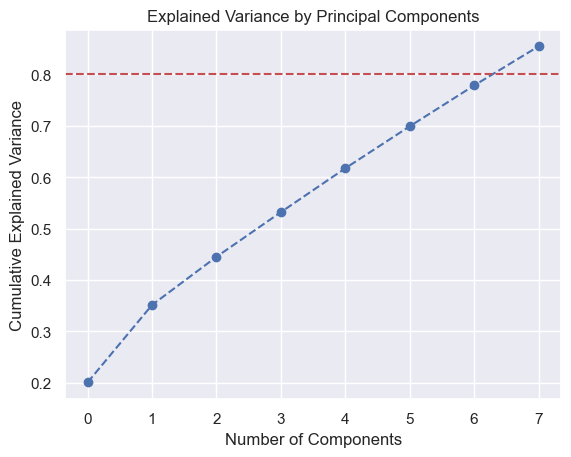

Number of components explaining at least 80% variance: 8


In [62]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance, marker='o', linestyle='--')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=0.8, color='r', linestyle='--')
plt.show()

# Select components that explain at least 80% variance
n_components = np.argmax(explained_variance >= 0.8) + 1
print(f"Number of components explaining at least 80% variance: {n_components}")

In [64]:
accuracy_pca = accuracy_score(y_test, pred_pca)
print("PCA Logistic Regression Accuracy:", accuracy_pca)

PCA Logistic Regression Accuracy: 0.5355805243445693


In [66]:
report_pca = classification_report(y_test, pred_pca, target_names=le.classes_, output_dict=True)
report_orig = classification_report(y_test_orig, pred_orig, target_names=le.classes_, output_dict=True)

precision_pca_hiphop = report_pca['Hip-hop']['precision']
precision_orig_hiphop = report_orig['Hip-hop']['precision']

precision_difference = precision_orig_hiphop - precision_pca_hiphop

print(f"Precision (With PCA) for 'Hip-hop': {precision_pca_hiphop:.4f}")
print(f"Precision (Without PCA) for 'Hip-hop': {precision_orig_hiphop:.4f}")
print(f"Difference in Precision: {precision_difference:.4f}")


Precision (With PCA) for 'Hip-hop': 0.4884
Precision (Without PCA) for 'Hip-hop': 0.4490
Difference in Precision: -0.0394


In [70]:
track_992 = data_copy.loc[992]

if pd.isnull(track_992['Genre']):
    # Prepare the features for prediction
    features_992 = track_992.drop(['Genre'] + list(non_numeric_columns)).values.reshape(1, -1)
    features_992_scaled = scaler.transform(features_992)
    
    # Predict using the original model
    prediction_992 = log_reg_orig.predict(features_992_scaled)
    predicted_genre_992 = le.inverse_transform(prediction_992)[0]
    
    print(f"The predicted genre for track 992 is: {predicted_genre_992}")
else:
    print(f"Track 992 already has a genre: {track_992['Genre']}")


Track 992 already has a genre: Rock
